# Introduction to digital forensics of cybercrime
## Assignment 2 - Database forensics
### Project Group 4
    Loek van der Gugten 1975331
    Reinier de Ridder   1701134
    Frank Nijeboer      2011972
    Jos Bartels         1941224
    Dionne Kingma       2419874
    Hanneke Verschoor   1954334

## Motivation and Goals

## Methodology

## Data
The data used in this assignment is loaded from the provided 'table_attack_twbooter.xls'. One slight edit has been made to this document: the url subdomains and prefix have been removed from the victum ip adresses and urls. This is to enable easier analysis of the victims using regular expressions.

In [85]:
# Load the DataFrame imported in preprocessing.py
from preprocessing import attack_df
# Import matplotlib library
import matplotlib.pyplot as plt

In [86]:
# Display the DataFrame to show used data as imported from 'table_attack_twbooter.xls'
attack_df

,id,processid,victim,port_service`_type,type,duration,time,stopped,client_attacker,server_used_in_th_attack
0,1,5672,91.214.20.52,80,ESSYN,33,1358989954,1,1,94.102.49.76
1,2,29065,91.214.20.52,80,UDP,1783,1358990329,1,1,93.174.93.30
2,3,23005,78.31.8.124,80,ESSYN,393,1358991360,0,1,89.248.172.97
3,4,29411,199.204.44.188,80,ESSYN,60,1358995416,0,4,93.174.93.30
4,5,19298,chrome-mods.com,80,RUDY,50000,1358995471,1,3,72.9.144.80
5,6,5764,174.120.6.116,53,ESSYN,50000,1358995498,1,3,94.102.49.76
6,7,24302,theblazingtech.com,80,RUDY,50000,1358995591,1,3,72.9.144.80
7,8,30056,77.92.131.135,80,UDP,60,1358995595,1,4,89.248.172.201
8,9,30060,198.154.220.66,80,ESSYN,50000,1358995611,1,3,93.174.93.30
9,10,30064,173.231.26.68,80,ESSYN,50000,1358995702,1,3,89.248.172.201


## Analysis

### The total number of attack records

In [87]:
# Get available index, effectivaly number of entries in the DataFrame
attack_entries = attack_df.index
# Display lenght of index, resulting in int of entries in the DataFrame
print(len(attack_entries))

RangeIndex(start=0, stop=48773, step=1)
48773


### Number of unique users

In [68]:
# Get number of unique values in "client_attacker" column
attackers = attack_df["client_attacker"].nunique()
# Display number
print(attackers)

277


### Top 10 Victim IP Addresses

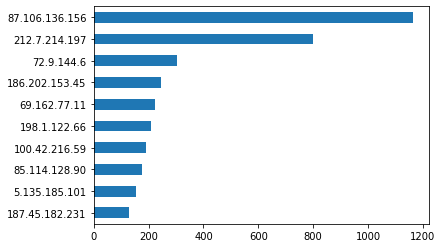

In [91]:
# IPython magic command for bts setup
%matplotlib inline
# Get values in column 'victim' that contains an ip adress (RegEx)
victims_ips = attack_df[attack_df["victim"].str.contains("[0-9].[0-9].[0-9].[0-9]")]
# Count number of entries for each value in 'victim' column, take the top 10, sort these in descending order and plot as a horizontal bar graph
victims_ips["victim"].value_counts().head(10).sort_values().plot.barh()
# Display the graph
plt.show()

### Top 10 Victim Domain Names

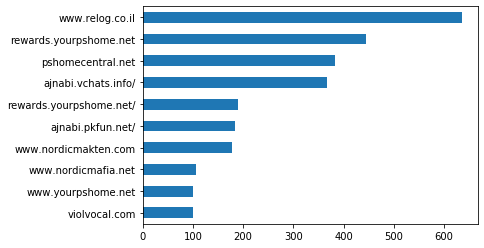

In [84]:
# Get values in column 'victim' that contains an url (RegEx)
victim_domains = attack_df[attack_df["victim"].str.contains("[A-z]")]
# Count number of entries for each value in 'victim' column, take the top 10, sort these in descending order and plot as a horizontal bar graph
victim_domains["victim"].value_counts().head(10).sort_values().plot.barh()
# Display the graph
plt.show()

### The longest attack duration

In [112]:
# Get biggest value in 'duration' column
duration = attack_df['duration'].max()
# Display value
print(duration)

500000


### Top 3 attack type

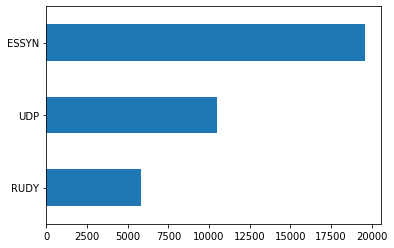

In [71]:
# Count number of entries for each value in 'type' column
attack_types = attack_df['type'].value_counts()
# Take the top 3, sort these in descending order and plot as a horizontal bar graph
attack_types.head(3).sort_values().plot.barh()
# Display the graph
plt.show()

### Which owner id performed most of the attacks

0    272
dtype: int64


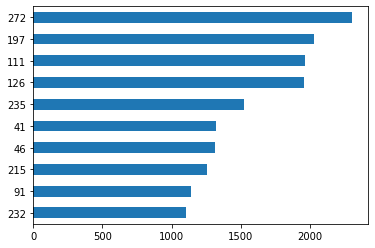

In [97]:
# Get the modes (highest frequency value) of 'client_attacker' column
attack_id = attack_df['client_attacker'].mode()
# Display modes
print(attack_id)

# Count number of entries for each value in 'client_attacker' column
attack_id = attack_df['client_attacker'].value_counts()
# Take the top 10, sort these in descending order and plot as a horizontal bar graph
attack_id.head(10).sort_values().plot.barh()
# Display graph
plt.show()

### How many attacks 'krebsonsecurity.com' suffered

In [12]:
# Get entries containing 'krebsonsecurity.com' from 'victims' column
# This ensures also values with added subdomains etc are included
kreb_attacks = attack_df[attack_df.victim.str.contains('krebsonsecurity.com')]
# Display lenght of entries, resulting in int of entries in the DataFrame
print(len(kreb_attacks))

15


### Add two statistics that I didn't list above

#### How often is port 80 used in port_service_type

37571 out of 48773
77%


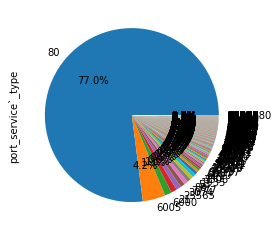

In [82]:
# Get entries in 'port_service' column that equal 80
port80_attacks = attack_df[attack_df['port_service`_type']==80]
# Display lenght of entries, resulting in int of entries in the DataFrame compared to total number of entries
print(str(len(port80_attacks)) + ' out of ' + str(len(attack_entries)))
# Calculate and display percentage of '80' entries
print(str(int(len(port80_attacks)/len(attack_entries)*100))+'%')

# Count number of entries for each value in 'port_service' column
port80_plot = attack_df["port_service`_type"].value_counts()
# Plot pie graph
port80_plot.plot.pie(autopct='%1.1f%%')
# Display graph
plt.show()

#### What percentage of attacks got stopped

27690 out of 48773
56%


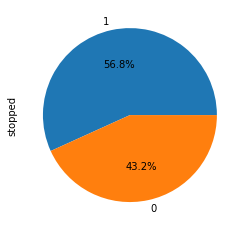

In [83]:
# Get entries in 'stopped' column that equal 1
stopped_attacks = attack_df[attack_df['stopped']==1]
# Display lenght of entries, resulting in int of entries in the DataFrame compared to total number of entries
print(str(len(stopped_attacks)) + ' out of ' + str(len(attack_entries)))
# Calculate and display percentage of '1' entries
print(str(int(len(stopped_attacks)/len(attack_entries)*100))+'%')

# Count number of entries for each value in 'stopped' column
stopped_attacks = attack_df["stopped"].value_counts()
# Plot pie graph
stopped_attacks.plot.pie(autopct='%1.1f%%')
# Display graph
plt.show()

## Conclusion